輸入立委臉書粉專內容及選舉政見資料

In [106]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以黃國昌為例，建立發文文字斷詞表

---



In [107]:
huang = fb[fb.page_name == "黃國昌"]
huang.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19360,449664581882455_1987236371392129,449664581882455,黃國昌,政治人物,【記者會直播中】\n\n「全面修補制度漏洞 才能遏止虐童悲劇」記者會\n時間：2019年01月15日，09:30\n地點：時代力量黨團\n出席：\n黃國昌｜時代力量立法委員\n林月琴｜靖娟基金會執行長\n黃韻璇｜兒福聯盟執行秘書\n彭盛韶｜時代力量智庫副執行長\n衛福部保護服務司｜黃瑞雯科長\n衛福部社會及家庭署｜ 祝健芳副署長,黃國昌的直播影片。,video,https://www.facebook.com/kcfor2016/videos/1987236371392129/,2019-01-15T01:30:35+0000,2019-01-15T09:30:35,...,NaN,NaN,2797,0,0,0,0,0,415,186


In [108]:
huang['new_date'] = pd.to_datetime(huang['created_time_taipei']).dt.date
huang['month_year'] = pd.to_datetime(huang['new_date']).dt.to_period('M')
huang.head(1)

<ipython-input-108-9efa112c6955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huang['new_date'] = pd.to_datetime(huang['created_time_taipei']).dt.date
<ipython-input-108-9efa112c6955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huang['month_year'] = pd.to_datetime(huang['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19360,449664581882455_1987236371392129,449664581882455,黃國昌,政治人物,【記者會直播中】\n\n「全面修補制度漏洞 才能遏止虐童悲劇」記者會\n時間：2019年01月15日，09:30\n地點：時代力量黨團\n出席：\n黃國昌｜時代力量立法委員\n林月琴｜靖娟基金會執行長\n黃韻璇｜兒福聯盟執行秘書\n彭盛韶｜時代力量智庫副執行長\n衛福部保護服務司｜黃瑞雯科長\n衛福部社會及家庭署｜ 祝健芳副署長,黃國昌的直播影片。,video,https://www.facebook.com/kcfor2016/videos/1987236371392129/,2019-01-15T01:30:35+0000,2019-01-15T09:30:35,...,2797,0,0,0,0,0,415,186,2019-01-15,2019-01


In [109]:
# 依照按讚數 低到高排序
huang = huang.sort_values(by=['like_count'])
# 用新的排序當作順序
huang.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [110]:
doc_names = range(len(huang)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 691)

In [111]:
huang = huang.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(huang['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [112]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

['蘇院長', '上任', '展現', '魄力', '，', '讓', '人', '印象', '深刻', '。', '\n', '\n', '不過', '，', '如果', '蘇院長', '認真', '檢視', '，', '其實', '可以', '容易', '發現', '：', '不少', '內閣', '閣員', '在', '立法院', '備詢', '，', '也', '是', '「', '一問', '三', '不知', '」', '、', '「', '連', '自己', '的', '業務', '都', '搞不清楚', '」', '。', '\n', '\n', '希望', '在', '同一', '標準', '的', '要求', '下', '，', '這種', '狀況', '能', '有', '實質', '的', '改善', '，', '好好', '上緊', '發條', '認真面', '對', '問題', '，', '別繼續', '在', '國會', '說', '謊', '胡扯', '踢皮球', '。', '\n', '\n', 'https', ':', '/', '/', 'ppt', '.', 'cc', '/', 'fnNk0x']


In [113]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7f9e211c2970>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [115]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("huang_dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
huang_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
huang_docs['jieba_results'] = huang_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    huang_docs = huang_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [116]:
#huang_docs.iloc[400:,]  #從讚數最多的檢查

In [117]:
huang['jieba_results'] = huang_docs
huang_post = huang[['new_date','message','jieba_results','like_count']]
huang_post

,new_date,message,jieba_results,like_count
0,2019-01-15,蘇院長上任展現魄力，讓人印象深刻。\n\n不過，如果蘇院長認真檢視，其實可以容易發現：不少內閣閣員在立法院備詢，也是「一問三不知」、「連自己的業務都搞不清楚」。\n\n希望在同一標準的要求下，這種狀況能有實質的改善，好好上緊發條認真面對問題，別繼續在國會說謊胡扯踢皮球。\n\nhttps://ppt.cc/fnNk0x,蘇院長 上任 展現 魄力 讓 人 印象 深刻 不過 如果 蘇院長 認真 檢視 其實 可以 容易 發現 不少 內閣 閣員 在 立法院 備詢 也 是 一問 三 不知 連 自己 的 業務 都 搞不清楚 希望 在 同一 標準 的 要求 下 這種 狀況 能 有 實質 的 改善 好好 上緊 發條 認真面 對 問題 別繼續 在 國會 說 謊 胡扯 踢皮球,140
1,2019-12-24,,,538
2,2019-08-31,【演講直播預告】\n「台灣的下一步」全國巡迴演講台南全美戲院場\n\n今天晚上，我將在台南舉辦第五場全國巡迴演講。\n演講內容將貫穿前四場演講的主題，提出「臺灣金權政治生態系」的架構，以具體案例檢視在此架構中「權貴經濟」、「權貴司法」的互動共生，以及一個「被權貴利益宰制、以顏色蒙敝是非」的失能國會，如何扮演推波助瀾的角色。\n\n晚上6:45將在YouTube【黃國昌國會質詢】頻道進行直播，歡迎網友收看。\n\n➡直播網址：https://youtu.be/vFrHi7ND4TQ\n\n⛔演講座談資訊\n\n✅主題：「台灣的下一步」全美戲院場\n🗓日期：8月31日（六）1900-2100\n📍地點：台南全美戲院\n\n⛔️演講回顧：\n\n【台灣的下一步光點華山場0720演講全程：\nhttps://www.youtube.com/watch?v=hLNlSr4xebs&feature=youtu.be】\n\n【台灣的下一步TICC場0728演講全程：https://www.youtube.com/watch?v=4NR-NRTGGH8】\n\n【台灣的下一步集思竹科場0804演講全程：https://www.youtube.com/watch?v=Xmh1J4gB-AY】\n\n【台灣的下一步台中場0824演講全程：https://www.youtube.com/watch?v=G0C6h0MS5PQ】,演講 直播 預告 台灣 的 下 一步 全國 巡 迴 演講 台南 全美 戲院場 今天 晚上 我將 在 台南 舉辦 第五 場全國 巡 迴 演講 演講 內容 將貫 穿 前 四場 演講 的 主題 提出 臺 灣金權 政治 生態系 的 架構 以 具體 案例 檢視 在 此架構 中 權貴 經濟 權貴 司法 的 互動 共生 以及 一個 被 權貴 利益 宰制 以顏色 蒙敝 是非 的 失能 國會 如何 扮演 推波助 瀾 的 角色 晚上 將在 黃 國昌國會 質詢 頻道 進行 直播 歡迎 網友 收看 直播 網址 ⛔ 演講座 談資訊 ✅ 主題 台灣 的 下 一步 全美 戲院場 🗓 日期 月 日 六 📍 地點 台南 全美 戲院 ⛔ ️ 演講 回顧 台灣 的 下 一步 光點 華山場 演講 全程 台灣 的 下 一步 場 演講 全程 台灣 的 下 一步 集思竹 科場 演講 全程 台灣 的 下 一步 台中場 演講 全程 】,804
3,2019-10-01,黃國昌全國巡迴演講第六場\n「台灣的下一步」高雄場，開放購票！\n\n前五場演講，我分別以「台灣如何拚經濟」、「公平正義、改變台灣」、「權貴司法與司法改革」，「金權政治下的金融地產財經幫」，以及「臺灣金權政治生態系」為主題，與大家共同討論當前臺灣所面臨的情況與須改革的方向。\n\n本週日的第六場演講，我將以「金權政治下的媒體」為主題，進一步分析政、商、媒三者的共生和互動，也解構為何旺旺中時這樣一個集團，迄今竟仍能在臺灣橫行，嚴重侵蝕臺灣的自由民主根基。\n\n邀請您共同參與討論，10月6日下午2點，高雄見！\n\nhttps://kccongress.kktix.cc/events/taiwannext6\n\n✅演講座談資訊\n「台灣的下一步」高雄場\n🗓日期：2019年10月6日（日）14:00-15:45\n📍地點：奧斯卡3d數位影城（高雄市新興區仁智街287號）\n💰票價：270元（售票收入全數用來支出活動費用）\n💺座數：195位（電子票券，依現場報到先後自由入座）\n\n為兼顧大家權益，搶先訂到票的朋友，若於24小時內未完成繳費，系統將自動取消您的訂票，敬請見諒。請大家注意售票平台的更新資訊。\n重要消費資訊：當天活動將另錄影播出,黃 國昌 全國 巡 迴 演講 第六 場 台灣 的 下 一步 高雄場 開放 購票 前五場 演講 我 分別 以 台灣 如何 拚經濟 公平 正義 改變 台灣 權貴 司法 與 司法 改革 金權 政治 下 的 金融 地產 財經 幫 以及 臺 灣金權 政治 生態系 為主題 與 大家 共同 討論 當前 臺 灣所面 臨 的 情況 與須 改革 的 方向 本週 日 的 第六 場演講 我將 以 金權 政治 下 的 媒體 為主題 進 一步 分析 政 商 媒 三者 的 共生 和 互動 也 解構 為何 旺旺 中時 這樣 一個 集團 迄今 竟 仍 能 在 臺 灣橫行 嚴重 侵蝕 臺 灣的 自由民主 根基 邀請 您 共同 參與 討論 月 日 下午 點 高雄見 ✅ 演講座 談資訊 台灣 的 下 一步 高雄場 🗓 日期 年 月 日 日 📍 地點 奧斯卡 數位 影城 高雄市 新興區 仁智街 號 💰 票價 元 售票 收入 全數 用 來 支出 活動費用 💺 座數 位 電子 票券 依現 場報 到 先 後 自由 入座 為 兼顧 大家 權益 搶先訂 到 票 的 朋友 若 於 小時 內 未 完成 繳費 系統 將自動 取消 您 的 訂票 敬請 見諒 請 大家 注意 售票 平台 的 更新 資訊 重要 消費 資訊 當天 活動將 另 錄影 播出,1140
4,2019-09-05,【國昌報告第十集：從一則突遭下架的新聞談起】\n\n今晚內容精要：\n\n➡回顧昨日囤房稅公聽會。\n➡一則突遭下架的新聞...\n➡業者不斷違法、交「保護費」了事。\n➡新北市政府避重就輕的託詞。\n➡正告案件相關人士、一週內依法處理。\n➡普悠瑪噴飛的軔塊、戳破臺鐵遮掩的謊言。\n➡普悠瑪斷裂的半永久式連結器。\n➡行政院交通部互踢皮球、不願公開的「臺鐵總體檢報告」。\n➡智慧教室案後續：行政部門長期縱容、地方政府把關鬆散、讓惡質廠商將國庫當提款機。\n➡回答網友提問。\n\nhttps://youtu.be/BWW2yTQttcI,國昌 報告 第十集 從 一則 突遭 下架 的 新聞 談起 今晚 內容 精要 回顧 昨日 囤 房稅 公聽會 一則 突遭 下架 的 新聞 業者 不斷 違法 交 保護費 了 事 新北市 政府 避重 就 輕 的 託 詞 正告 案件 相關 人士 一週 內 依法 處理 普悠瑪 噴飛 的 軔 塊 戳破 臺 鐵 遮掩 的 謊言 普悠瑪斷 裂 的 半 永久 式 連結器 行政院 交通部 互 踢皮球 不願 公開 的 臺 鐵 總體 檢報告 智慧 教室 案後續 行政部 門長 期 縱容 地方 政府 把 關 鬆 散 讓 惡質 廠 商將 國庫當 提款 機 回答 網友 提問,1142
...,...,...,...,...
686,2019-06-23,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼續 努力,48269
687,2019-06-23,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這樣可能很難坐地上。站3個小時，大家受的了嗎？」\n\n一夜未眠的智偉笑著說：「沒問題啦，我們這個又不是韓國瑜那種場！」\n\n智偉說的真好。\n\n守護臺灣民主、我們風雨無阻！\n\n#下午2點凱道見\n#竟然深夜就有朋友來排隊\n#謝謝大家的支持,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 看著 被 雨水 濕透 的 路面 我 說 這樣 可能 很難 坐 地上 站 個小時 大家 受 的 了 嗎 一夜 未眠 的 智偉笑 著 說 沒 問題 啦 我們 這個 又 不是 韓國瑜 那 種場 智偉 說 的 真 好 守護 臺 灣 民主 我們 風雨 無阻 下午 點凱 道 見 竟然 深夜 就 有 朋友 來 排隊 謝謝 大家 的 支持,49418
688,2019-11-28,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權勢地位、掠奪國家資源、牟取個人私利。而且，我向來不問立場顏色、只看是非對錯。\n\n韓國瑜所高舉的「庶民形象」，在最近的南港7200萬豪宅風波中，受到重挫。無論是涉及利用管道炒作預售屋牟利，還是與炒房團一起得到台肥2成貸款，都是造成房價飛漲、讓年輕人買不起房的幫兇，引起眾怒，理所當然。\n\n不過，最近接到的檢舉，經過一段時間追查，發現遠比7200萬豪宅更為離譜。韓國瑜與李佳芬家族特權掠奪國家資源的行徑，讓人完全看不下去！\n\n⛔這個故事有點長，也有不同階段。今晚，我先從Part I的背景開始講起。\n\n1998年，雲林西螺李家，在濁水溪西螺大橋附近的行水區盜採砂石，由李日貴設立的「大通砂石行（嗣後成為「大通砂

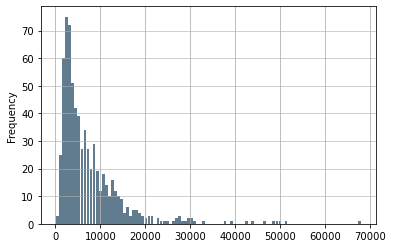

In [118]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = huang_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [119]:
temp = huang_post[(huang_post['like_count'] <= 70000) & (huang_post['like_count'] > 10000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
528,2019-06-08,給關心的朋友：11:00直播預告\n\n在5月31日以前，我將全部心力放在立法院工作之上，直到會期告一段落，才開始思考未來的方向。\n\n這個方向，與其說是我個人的方向，更適切的描述是：著眼於臺灣目前的挑戰，應該將自己放在什麼戰鬥位置上、做什麼樣的努力？\n\n在短期2020年的選舉政治上，我認為重要的目標很清楚：\n \n1. 為了臺灣主權與民主自由，不能讓中國國民黨重新取得總統執政權。\n\n2. 有鑑於過去11年，無論何黨執政又絕對掌控立法院所導致的負面教訓，國會必須有一個站在人民立場，扮演關鍵制衡、理性監督的角色，既非小藍也非小綠的第三勢力。\n\n關於第一個目標，已經有許多能人志士投入努力；\n關於第二個目標，真正困難的問題是「如何做到」？\n\n我深知，除非能夠徹底擺脫小綠的標籤，否則單靠時代力量，很難建立足以讓兩黨國會均不過半的真正第三勢力。\n\n也因此，在和顯智清楚說明我的想法與計畫後，我開始了個人的請益之旅。 \n\n和館長見面，深談了3個多小時，就是這個請益之旅的第二站。\n\n本來想告一段落後，再與所有抱持相同志向的朋友，一起向大家報告。\n\n不過，既然館長已經公開說明了部分內容，這一兩天也接到不少探詢，我想就先跟關心的朋友說明。\n\n等等約11:00，我會在YouTube上開直播，和大家聊聊。\n\n※直播網址：（已結束）\nhttps://www.youtube.com/channel/UCNWAsexY9eiS1N6JDns-0kw/live\n\n※重播存檔：（請點下面網址）\nhttps://www.youtube.com/watch?v=OTDiLHTaAD8,給關心 的 朋友 直播 預告 在 月 日 以前 我將 全部 心力 放在 立法院 工作 之上 直到 會期 告一段落 才 開始 思考 未來 的 方向 這個 方向 與 其 說 是 我 個 人 的 方向 更 適切 的 描述 是 著眼 於 臺 灣 目前 的 挑戰 應 該將 自己 放在 什麼 戰鬥 位置 上 做 什麼樣 的 努力 在 短期 年 的 選舉 政治 上 我 認為 重要 的 目標 很 清楚 為 了 臺 灣主權 與 民主自由 不能 讓 中國 國民黨 重新 取得 總統 執政權 有鑑 於 過去 年 無論 何黨 執政 又 絕對 掌控 立法院 所導致 的 負面 教訓 國會 必須 有 一個 站 在 人民 立場 扮演 關鍵 制衡 理性 監督 的 角色 既非 小 藍 也 非小綠 的 第三 勢力 關於 第一 個 目標 已經 有 許多能 人 志士 投入 努力 關於 第二 個 目標 真正 困難 的 問題 是 如何 做到 我 深知 除非 能夠 徹底 擺 脫小綠 的 標 籤 否則 單靠 時代 力量 很難 建立 足以 讓 兩黨 國會 均 不過 半 的 真正 第三 勢力 也 因此 在 和 顯智 清楚 說明 我 的 想法 與 計畫 後 我 開始 了 個 人 的 請益 之 旅 和 館長 見面 深談 了 個 多小時 就是 這個 請益 之 旅 的 第二站 本來 想 告一段落 後 再 與 所有 抱持 相同 志向 的 朋友 一起 向 大家 報告 不過 既然 館長 已 經公開 說明 了 部分 內容 這一 兩天 也 接到 不少 探詢 我 想 就 先 跟 關心 的 朋友 說明 等等 約 我會 在 上開 直播 和 大家 聊聊 ※ 直播 網址 已 結束 ※ 重播 存檔 請點 下面 網址,10048
529,2019-06-03,議員違法養雞場、縣政府包庇、農委會跳票\n\n屏東縣議員周碧雲在枋寮鄉違法經營養雞場的劣行，上周於立法院經濟委員會上，農委會主委公開承諾，會於周末前解決，婉拒我提出共同下去會勘的邀請。\n\n然而，今天詢問農委會處理情形，卻根本沒有解決。\n\n今天屏東縣政府開了個會，不敢直接面對長期縱容周碧雲違反《畜牧法》、《水污染防治法》與《廢棄物清理法》的核心問題，企圖移轉焦點到申請用地變更，繼續大玩踢皮球的遊戲！\n\n這麼離譜的明顯違法，已經持續超過4年，到現在屏東縣政府還在推諉塞責、包庇違法，簡直讓人忍無可忍！\n\n本周，我將前往屏東枋寮夜宿，並與鄉親站在一起，前往屏東縣政府強烈抗議！我也將邀請農委會主委與相關主管機關，一同前往現場，回答一個最簡單的問題：\n\n「當地方政府包庇議員欺凌人民，我們能夠怎麼辦？」\n\n備註：2019-5-30 經濟委員會 \n誰在包庇屏東違法養雞場 https://reurl.cc/Vgzdn,議員 違法養 雞場 縣 政府 包庇 農委會 跳票 屏東縣 議員 周碧雲在 枋寮 鄉 違法 經營養 雞場 的 劣行 上周 於 立法院 經濟委員會 上 農委會 主委 公開 承諾 會 於 周末 前解決 婉拒 我 提出 共同 下去 會 勘 的 邀 請 然而 今天 詢問 農委會 處理 情形 卻 根本 沒有 解決 今天 屏東縣 政府 開 了 個 會 不敢 直接 面對長 期 縱容 周碧雲違 反 《 畜牧法 《 水污染 防治法 與 《 廢棄物 清理 法 的 核心 問題 企圖 移轉 焦點 到 申請 用地 變 更 繼續 大 玩 踢皮球 的 遊戲 這麼 離譜 的 明顯 違法 已經 持續 超過 年 到現 在 屏東縣 政府 還在 推諉 塞責 包庇 違法 簡直 讓 人 忍無可忍 本周 我將 前往 屏東 枋寮 夜宿 並與 鄉親 站 在 一起 前往 屏東縣 政府 強烈 抗議 我 也 將邀 請 農委會 主委 與 相關 主管 機關 一同 前往 現場 回答 一個 最 簡單 的 問題 當 地方 政府 包庇 議員 欺凌 人民 我們 能夠 怎麼 辦 備 註 經濟委員會 誰 在 包庇 屏東 違法養 雞場,10062
530,2019-03-13,林益世這個大貪官，外役監申請被正式駁回！\n\n感謝大家的共同關注！沒讓矯正署偷偷放他過關。\n\n也請林益世好好在牢裡重新反省：\n還要繼續硬拗「6300萬是收取、不是收賄」嗎？\n\nhttps://news.ltn.com.tw/news/society/breakingnews/2726054,林 益世 這個 大 貪官 外役 監申 請 被 正式 駁回 感謝 大家 的 共同 關注 沒 讓 矯正署 偷偷 放 他 過關 也 請林 益世 好好 在 牢裡 重新 反省 還要 繼續 硬拗 萬是 收取 不是 收賄 嗎,10077
531,2019-10-08,謝謝今周刊製作這個重要的專題。\n\n最後的結語，一針見血，直指臺灣目前金權政治的問題：\n\n關於台灣的居住正義，那些飛在空中的假球，是否能好好的用手套接起來？我們需要的絕對不會是「假球」，而是真正的「決心」。\n\nhttps://reurl.cc/Znb54A,謝謝 今 周刊 製 作 這 個 重要 的 專題 最後的 結語 一針 見 血 直指 臺 灣 目前 金權 政治 的 問題 關於 台灣 的 居住 正義 那些 飛在 空中 的 假球 是否 能 好好 的 用 手套 接起 來 我們 需要 的 絕對 不會 是 假球 而是 真正 的 決心,10168
532,2019-03-19,,,10189
...,...,...,...,...
686,2019-06-23,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼續 努力,48269
687,2019-06-23,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這樣可能很難坐地上。站3個小時，大家受的了嗎？」\n\n一夜未眠的智偉笑著說：「沒問題啦，我們這個又不是韓國瑜那種場！」\n\n智偉說的真好。\n\n守護臺灣民主、我們風雨無阻！\n\n#下午2點凱道見\n#竟然深夜就有朋友來排隊\n#謝謝大家的支持,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 看著 被 雨水 濕透 的 路面 我 說 這樣 可能 很難 坐 地上 站 個小時 大家 受 的 了 嗎 一夜 未眠 的 智偉笑 著 說 沒 問題 啦 我們 這個 又 不是 韓國瑜 那 種場 智偉 說 的 真 好 守護 臺 灣 民主 我們 風雨 無阻 下午 點凱 道 見 竟然 深夜 就 有 朋友 來 排隊 謝謝 大家 的 支持,49418
688,2019-11-28,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權勢地位、掠奪國家資源、牟取個人私利。而且，我向來不問立場顏色、只看是非對錯。\n\n韓國瑜所高舉的「庶民形象」，在最近的南港7200萬豪宅風波中，受到重挫。無論是涉及利用管道炒作預售屋牟利，還是與炒房團一起得到台肥2成貸款，都是造成房價飛漲、讓年輕人買不起房的幫兇，引起眾怒，理所當然。\n\n不過，最近接到的檢舉，經過一段時間追查，發現遠比7200萬豪宅更為離譜。韓國瑜與李佳芬家族特權掠奪國家資源的行徑，讓人完全看不下去！\n\n⛔這個故事有點長，也有不同階段。今晚，我先從Part I的背景開始講起。\n\n1998年，雲林西螺李家，在濁水溪西螺大橋附近的行水區盜採砂石，由李日貴設立的「大通砂石行（嗣後成為「大通砂石股份有限公司」）攫取暴利。當年，李日貴將雲林縣議員的位置，順利交棒給女兒李佳芬，而女婿韓國瑜，也在中央擔任立委。\n\n⛔1990年代，可以在濁水溪上盜採砂石的，

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [120]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [121]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [122]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一件,一份,一位,一個,一倍,一再,一刀,一切,...,點看,點記者,點頭,黨側,黨務,黨團,黨部,鼓勵,龐大,龜縮
0,0.0,0.0,0.0,0.0,0.00000,0.041658,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.050868,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0,0.0,0.0,0.0,0.32389,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
159,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
160,0.0,0.0,0.0,0.0,0.00000,0.044538,0.0,0.0,0.0,0.037054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041269,0.0
161,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [123]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['要求', '違法', '政治', '可以', '枋寮', '鄉親', '沒有', '弊案', '縣府', '屏東']
TOP 10 WORDS PER TOPIC #1
['我們', '真正', '朋友', '目前', '總統', '客戶', '這種', '政府', '銀行', '問題']
TOP 10 WORDS PER TOPIC #2
['要求', '紅色', '政治', '拒絕', '媒體', '一起', '中共', '中天', '時代', '力量']
TOP 10 WORDS PER TOPIC #3
['周典論', '什麼', '力量', '迄今', '到底', '協商', '處理', '王敬', '韓國瑜', '屏東']
TOP 10 WORDS PER TOPIC #4
['李佳芬', '牟利', '資源', '堤防', '家族', '國家', '李家', '砂石', '圈地', '韓國瑜']
TOP 10 WORDS PER TOPIC #5
['議長', '貪腐', '周典論', '違法養', '雞場', '包庇', '違法', '政府', '屏東縣', '屏東']
TOP 10 WORDS PER TOPIC #6
['守護', '中心', '民主', '大家', '政府', '一個', '朋友', '台灣', '屏東', '我們']
TOP 10 WORDS PER TOPIC #7
['草案', '違法', '繼續', '蔡衍明', '公開', '大家', '活動', '政府', '沒有', '中天']


In [124]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['許多', '違建', '相信', '許東雄', '體育署', '智偉', '理念', '公司', '新聞', '衛福部']
TOP 10 WORDS PER TOPIC #1
['因為', '何不', '所以', '堅持', '香港', '兩邊', '總來', '不見', '不散', '加油']
TOP 10 WORDS PER TOPIC #2
['媒體', '出來', '屏東縣', '大家', '一起', '違法', '我們', '政府', '屏東', '韓國瑜']
TOP 10 WORDS PER TOPIC #3
['令人', '一定', '華航', '慶富', '高層', '社論', '旺旺', '一下', '老婆', '中時']
TOP 10 WORDS PER TOPIC #4
['很小', '肌肉', '檢測', '電話', '宜蘭縣', '何不', '無良', '休息', '昨晚', '鄭宏輝']
TOP 10 WORDS PER TOPIC #5
['東西', '正義改', '公平', '報導', '支持', '回到', '時代', '力量', '澎湖', '故宮']
TOP 10 WORDS PER TOPIC #6
['施壓', '世紀', '華航', '益世', '大兵', '基金', '悲劇', '王國材', '交通部', '公布']
TOP 10 WORDS PER TOPIC #7
['考驗', '客戶', '真的', '總來', '民主', '關閉', '風雨', '銀行', '雞場', '樂樂養']


In [139]:
#政見做斷詞

politics_huang = politics[politics.姓名 == "黃 國 昌"].政見.to_string()
politics_huang = re.sub(re_punctuation, "", politics_huang)
politics_huang = re.sub(r'[0-9]','',politics_huang)
politics_huang = re.sub(r'[a-zA-Z]','',politics_huang)
politics_huang = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_huang)  # 注意裡面不能有空白！
jieba.load_userdict("huang_dict.txt")
politics_words = jieba.lcut(politics_huang, cut_all = False)


In [140]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_huang, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [144]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['一氣', '三黨', '不再', '不想', '下台', '不可', '一股', '一噸', '一邊', '上升幅度']
TOP 10 WORDS PER TOPIC #1
['下一個', '上線', '不必要', '下去', '不及', '不少', '不得不', '上星期', '一直', '上映']
TOP 10 WORDS PER TOPIC #2
['不僅僅', '一片', '上面', '一天到晚', '一所', '一次', '三房', '上次', '不太', '上來']
TOP 10 WORDS PER TOPIC #3
['不公', '上週', '不好意思', '不久', '一路', '一則', '一錯', '一個', '下限', '下約']
TOP 10 WORDS PER TOPIC #4
['不作聲', '三百', '上響', '不差', '一變', '一樣', '一段', '一包', '三讀', '下班']
TOP 10 WORDS PER TOPIC #5
['一顆', '上升', '一定', '不得', '一夜', '不前', '一件', '不屬', '一邊踐', '上個']
TOP 10 WORDS PER TOPIC #6
['上周', '不已', '不合理', '不住', '一巴掌', '上任', '不客', '一般', '不全', '下游']
TOP 10 WORDS PER TOPIC #7
['三項', '一切', '不好', '下來', '下會期', '下面', '一塊', '不會', '下周', '一天']


In [145]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ') 

一氣, 三黨, 不再, 不想, 下台, 不可, 一股, 一噸, 一邊, 上升幅度, 下一個, 上線, 不必要, 下去, 不及, 不少, 不得不, 上星期, 一直, 上映, 不僅僅, 一片, 上面, 一天到晚, 一所, 一次, 三房, 上次, 不太, 上來, 不公, 上週, 不好意思, 不久, 一路, 一則, 一錯, 一個, 下限, 下約, 不作聲, 三百, 上響, 不差, 一變, 一樣, 一段, 一包, 三讀, 下班, 一顆, 上升, 一定, 不得, 一夜, 不前, 一件, 不屬, 一邊踐, 上個, 上周, 不已, 不合理, 不住, 一巴掌, 上任, 不客, 一般, 不全, 下游, 三項, 一切, 不好, 下來, 下會期, 下面, 一塊, 不會, 下周, 一天, 

In [146]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'一氣': 1,
         '三黨': 1,
         '不再': 1,
         '不想': 1,
         '下台': 1,
         '不可': 1,
         '一股': 1,
         '一噸': 1,
         '一邊': 1,
         '上升幅度': 1,
         '下一個': 1,
         '上線': 1,
         '不必要': 1,
         '下去': 1,
         '不及': 1,
         '不少': 1,
         '不得不': 1,
         '上星期': 1,
         '一直': 1,
         '上映': 1,
         '不僅僅': 1,
         '一片': 1,
         '上面': 1,
         '一天到晚': 1,
         '一所': 1,
         '一次': 1,
         '三房': 1,
         '上次': 1,
         '不太': 1,
         '上來': 1,
         '不公': 1,
         '上週': 1,
         '不好意思': 1,
         '不久': 1,
         '一路': 1,
         '一則': 1,
         '一錯': 1,
         '一個': 2,
         '下限': 1,
         '下約': 1,
         '不作聲': 1,
         '三百': 1,
         '上響': 1,
         '不差': 1,
         '一變': 1,
         '一樣': 1,
         '一段': 1,
         '一包': 1,
         '三讀': 1,
         '下班': 1,
         '一顆': 1,
         '上升': 1,
         '一定': 1,
         '不得': 1,
         '一夜': 1

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

高科技 相關tf idf 高 (以下討論臉書貼文)

In [177]:
top_10_message = tfidf_view.sort_values(by = ['包庇'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['包庇'], ascending = False).head(10)

,一一,一下,一件,一份,一位,一個,一倍,一再,一刀,一切,...,點記者,點頭,黨側,黨務,黨團,黨部,鼓勵,龐大,龜縮,term
1,0.000000,0.0,0.0,0.0,0.0,0.050868,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,農委會
30,0.062848,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東
70,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.040488,...,0.0,0.0,0.0,0.0,0.0,0.040488,0.0,0.0,0.0,屏東
112,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,廢弛
37,0.000000,0.0,0.0,0.0,0.0,0.030066,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,設計
29,0.000000,0.0,0.0,0.0,0.0,0.023069,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.038386,0.0,0.0,0.0,屏東
60,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,說句
73,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,議長
94,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,違建
129,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東縣


In [179]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[129,]).sort_values(by = 129, ascending=False)
#pd.DataFrame(tfidf_view.iloc[112,]).sort_values(by = 112, ascending=False)
# bad attemption 


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [156]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

143     帳戶
144     不散
145     毫不
146     砂石
147     換照
148     守護
149    韓國瑜
150     一一
151     中天
152     西螺
153    商贊助
154     傳來
155    韓國瑜
156     一位
157    我靜靜
158     一位
159     智偉
160     抽砂
161     揭發
162     權借
Name: term, dtype: object

In [161]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="韓國瑜"]

,一一,一下,一件,一份,一位,一個,一倍,一再,一刀,一切,...,點記者,點頭,黨側,黨務,黨團,黨部,鼓勵,龐大,龜縮,term
119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.049933,0.0,0.0,0.0,0.0,0.0,0.0,韓國瑜
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,韓國瑜
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,韓國瑜
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,韓國瑜


In [158]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[119]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [163]:
message_newtfidf[message_newtfidf['term']=="屏東"]

,一一,一下,一件,一份,一位,一個,一倍,一再,一刀,一切,...,點記者,點頭,黨側,黨務,黨團,黨部,鼓勵,龐大,龜縮,term
29,0.000000,0.0,0.0,0.0,0.0,0.023069,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.038386,0.0,0.0,0.0,屏東
30,0.062848,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東
33,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.081887,0.0,0.0,0.0,屏東
61,0.000000,0.0,0.0,0.0,0.0,0.051074,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東
70,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.040488,...,0.0,0.0,0.0,0.0,0.0,0.040488,0.0,0.0,0.0,屏東
74,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東
88,0.000000,0.0,0.0,0.0,0.0,0.052515,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,屏東


In [164]:
temp.iloc[[29,30,33],2]

557     周典論 家族 的 無恥 真的 沒有 下限 上次 周典論 說 他 已告 我  今天 周佳琪 說 她 也 告 了  我 真的 不 知道 你們 到底 要告 什麼 告 我 洩漏 屏東 機密 告 我 破壞 皇城 和諧 在 周碧雲違 法亂 搞 的 這幾年 擔任 議長 的 周典論 不僅 沒 有 幫 枋寮 鄉親 討 公道 反而 大喇喇地 用 屏東縣 議會 公文 幫 周碧雲護航 公文 上面 蓋 的 名字 正是 周典論 啊 現在 竟然 還有 臉 說 絕對 與 鄉 親站 在 一起 要求 取締 違法 無恥 到 這種 程度 令人咋舌  再 說 一次 我 就是 無法 坐視 這種 魚肉 鄉里 的 貪腐 政治 家族 濫用 權勢 作威作福 傷害 善良 的 屏東 鄉親   向 周典論 貪腐 集團 宣戰  請屏 東縣 政府 撤銷 違法養 雞場      ⛔ ️ 附 註 追 蹤 屏 東 弊 案 歷 程      枋寮 的 清晨 雞 屎 的 空氣           樂樂養 雞場 直播           枋寮 的 惡 臭           別 再 包庇 周碧雲的 違法養 雞場 請速 撤照 別 再 拖延           有 朋友 問我 為何 這麼 關心 屏東 的 選舉           財 政委 員會 政府 採購 標案 淪為 惡質 廠商 的 大 肥肉           審計長 人事 同意 權審查           告別 黑金 政治 還給 人民 乾淨 屏東           周碧雲違 法養 雞場 屏東 縣府 重罰  萬           嗯 再 收押 一個 屏東 三小傑終 於 在 獄 中 相會            屏東 縣府 竟然 靜靜 地放 大家 鴿子 今天下午 突然 自己 跑 去 結束 會 勘            請 大家 一起 關注 聲援 明天 的 屏東 違法養 雞場 會 勘           屏東縣 議會 周典論 的 大將 終於 栽 了           簡要 報告 屏東 議員 周碧雲違 法養 雞場 後 續           屏東縣 政府 擺爛 中央政府 配合 放水 記者 會           國昌 報告  我 是 如何 追弊 ─ ─ 以屏 東養 雞場案 為例           請 屏東 縣府 別 再 說 謊           明天 上午 十點 前往 監

In [165]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['許多', '違建', '相信', '許東雄', '體育署', '智偉', '理念', '公司', '新聞', '衛福部']
TOP 10 WORDS PER TOPIC #1
['因為', '何不', '所以', '堅持', '香港', '兩邊', '總來', '不見', '不散', '加油']
TOP 10 WORDS PER TOPIC #2
['媒體', '出來', '屏東縣', '大家', '一起', '違法', '我們', '政府', '屏東', '韓國瑜']
TOP 10 WORDS PER TOPIC #3
['令人', '一定', '華航', '慶富', '高層', '社論', '旺旺', '一下', '老婆', '中時']
TOP 10 WORDS PER TOPIC #4
['很小', '肌肉', '檢測', '電話', '宜蘭縣', '何不', '無良', '休息', '昨晚', '鄭宏輝']
TOP 10 WORDS PER TOPIC #5
['東西', '正義改', '公平', '報導', '支持', '回到', '時代', '力量', '澎湖', '故宮']
TOP 10 WORDS PER TOPIC #6
['施壓', '世紀', '華航', '益世', '大兵', '基金', '悲劇', '王國材', '交通部', '公布']
TOP 10 WORDS PER TOPIC #7
['考驗', '客戶', '真的', '總來', '民主', '關閉', '風雨', '銀行', '雞場', '樂樂養']


In [167]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
528,2019-06-08,給關心 的 朋友 直播 預告 在 月 日 以前 我將 全部 心力 放在 立法院 工作 之上 直到 會期 告一段落 才 開始 思考 未來 的 方向 這個 方向 與 其 說 是 我 個 人 的 方向 更 適切 的 描述 是 著眼 於 臺 灣 目前 的 挑戰 應 該將 自己 放在 什麼 戰鬥 位置 上 做 什麼樣 的 努力 在 短期 年 的 選舉 政治 上 我 認為 重要 的 目標 很 清楚 為 了 臺 灣主權 與 民主自由 不能 讓 中國 國民黨 重新 取得 總統 執政權 有鑑 於 過去 年 無論 何黨 執政 又 絕對 掌控 立法院 所導致 的 負面 教訓 國會 必須 有 一個 站 在 人民 立場 扮演 關鍵 制衡 理性 監督 的 角色 既非 小 藍 也 非小綠 的 第三 勢力 關於 第一 個 目標 已經 有 許多能 人 志士 投入 努力 關於 第二 個 目標 真正 困難 的 問題 是 如何 做到 我 深知 除非 能夠 徹底 擺 脫小綠 的 標 籤 否則 單靠 時代 力量 很難 建立 足以 讓 兩黨 國會 均 不過 半 的 真正 第三 勢力 也 因此 在 和 顯智 清楚 說明 我 的 想法 與 計畫 後 我 開始 了 個 人 的 請益 之 旅 和 館長 見面 深談 了 個 多小時 就是 這個 請益 之 旅 的 第二站 本來 想 告一段落 後 再 與 所有 抱持 相同 志向 的 朋友 一起 向 大家 報告 不過 既然 館長 已 經公開 說明 了 部分 內容 這一 兩天 也 接到 不少 探詢 我 想 就 先 跟 關心 的 朋友 說明 等等 約 我會 在 上開 直播 和 大家 聊聊 ※ 直播 網址 已 結束 ※ 重播 存檔 請點 下面 網址
529,2019-06-03,議員 違法養 雞場 縣 政府 包庇 農委會 跳票 屏東縣 議員 周碧雲在 枋寮 鄉 違法 經營養 雞場 的 劣行 上周 於 立法院 經濟委員會 上 農委會 主委 公開 承諾 會 於 周末 前解決 婉拒 我 提出 共同 下去 會 勘 的 邀 請 然而 今天 詢問 農委會 處理 情形 卻 根本 沒有 解決 今天 屏東縣 政府 開 了 個 會 不敢 直接 面對長 期 縱容 周碧雲違 反 《 畜牧法 《 水污染 防治法 與 《 廢棄物 清理 法 的 核心 問題 企圖 移轉 焦點 到 申請 用地 變 更 繼續 大 玩 踢皮球 的 遊戲 這麼 離譜 的 明顯 違法 已經 持續 超過 年 到現 在 屏東縣 政府 還在 推諉 塞責 包庇 違法 簡直 讓 人 忍無可忍 本周 我將 前往 屏東 枋寮 夜宿 並與 鄉親 站 在 一起 前往 屏東縣 政府 強烈 抗議 我 也 將邀 請 農委會 主委 與 相關 主管 機關 一同 前往 現場 回答 一個 最 簡單 的 問題 當 地方 政府 包庇 議員 欺凌 人民 我們 能夠 怎麼 辦 備 註 經濟委員會 誰 在 包庇 屏東 違法養 雞場
530,2019-03-13,林 益世 這個 大 貪官 外役 監申 請 被 正式 駁回 感謝 大家 的 共同 關注 沒 讓 矯正署 偷偷 放 他 過關 也 請林 益世 好好 在 牢裡 重新 反省 還要 繼續 硬拗 萬是 收取 不是 收賄 嗎
531,2019-10-08,謝謝 今 周刊 製 作 這 個 重要 的 專題 最後的 結語 一針 見 血 直指 臺 灣 目前 金權 政治 的 問題 關於 台灣 的 居住 正義 那些 飛在 空中 的 假球 是否 能 好好 的 用 手套 接起 來 我們 需要 的 絕對 不會 是 假球 而是 真正 的 決心
532,2019-03-19,
...,...,...
686,2019-06-23,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼續 努力
687,2019-06-23,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 看著 被 雨水 濕透 的 路面 我 說 這樣 可能 很難 坐 地上 站 個小時 大家 受 的 了 嗎 一夜 未眠 的 智偉笑 著 說 沒 問題 啦 我們 這個 又 不是 韓國瑜 那 種場 智偉 說 的 真 好 守護 臺 灣 民主 我們 風雨 無阻 下午 點凱 道 見 竟然 深夜 就 有 朋友 來 排隊 謝謝 大家 的 支持
688,2019-11-28,特權 掠 奪國家 資源 韓李 家族 發大財 瞭解 我 問政風格 的 朋友 都 知道 我 十分 痛恨 政治 人物 濫用 權勢 地位 掠奪 國家 資源 牟取 個 人 私利 而且 我 向 來 不 問立場 顏色 只 看 是非 對錯 韓國瑜 所 高舉 的 庶民 形象 在 最近 的 南港 萬 豪宅 風波 中 受到 重挫 無論 是 涉及 利用 管道 炒作 預售屋 牟利 還是 與 炒 房團 一起 得到 台肥 成貸款 都 是 造成 房價 飛漲 讓 年 輕人 買 不 起房 的 幫 兇 引起 眾怒 理所 當然 不過 最近 接到 的 檢舉 經過 一段 時間 追查 發現 遠 比 萬 豪宅 更為 離譜 韓國瑜 與 李佳芬 家族 特權 掠 奪國家 資源 的 行徑 讓 人 完全 看不下去 ⛔ 這個 故事 有點長 也 有 不同 階段 今晚 我 先 從 的 背景 開始 講起 年 雲林 西螺 李家 在 濁 水溪 西螺 大橋 附近 的 行水區 盜採 砂石 由 李日貴 設立 的 大通 砂石 行 嗣後成 為 大通 砂石 股份 有限公司 攫取 暴利 當年 李日貴 將雲林縣 議員 的 位置 順利 交棒給 女兒 李佳芬 而 女婿 韓國瑜 也 在 中央 擔任 立委 ⛔ 年代 可以 在 濁 水溪 上 盜採 砂石 的 都 不是 簡單 人物 龐大 的 砂石 利益 背後都 有 地方 派系 與 黑道 勢力 水利 署電子 報上 刊載 的 水利 故事集 有著 如下 的 描述 業者 使用 抽砂 船 抽取 河砂 使得 河床 刷 深 更 嚴重 每部 抽砂 船背 後 代表 一個 勢力 當時 全省 有 部 抽砂 船 濁水溪 就 佔 了 部 抽砂 船 的 管線 最長 可達 公里 最深 可 抽到 地面 下約 公尺 深 卻 沒 有 一 臺 抽砂 船是 合法 或 經許 可 的 抽砂 船 就 像 吸血鬼 般日 以 繼夜 吸食 溪流 青春 的 血 其 危害 是 挖土 機 的 倍 以上 當時 雲林縣 政府 水利 課技 士林 超 曾多次 反映 但 無 人理 會 他 想 只有 讓 中 沙大橋 這條 交通 經濟命脈 垮 崩解 問題 才 會 受到 重視 後 來 中 沙大橋橋 碁 嚴重 裸露 中央 與 省政府 都 跳 起來 了 嗣 後 由 宋楚瑜 主政 的 省府 開始 師法 日本 黑道 自治 區 的 概念 將盜採 砂石 的 業者 組織 起來 以 疏濬 為名 聯 合共 提計畫 採砂 與 政府 達成 協議 禁止 在 河道 上 使用 抽砂 船 這 就是 所謂 的 聯管 計畫 濁水溪 成為 聯管 計畫 的 第一 個 示範 河段 並將 河床 採石區 依橋 梁劃 分成 四個 區段 雲林 李家 取得 了 第三 區 西螺 大橋 至 自強 大橋間 的 聯管計 畫權 ⛔ 不過 問題 來 了 李佳芬 家族 在 濁水 溪河 床上 的 抽砂 船 本來 佔 有 極佳 位置 抽取 出來 的 黑沙 含量 最高 品質 最好 價格 最佳 然而 由 於 聯管 計畫 要求 抽砂 船離開 河川 李家 捨 不得 離開 西螺 大橋 下游 南岸 這個 好 地點 面臨 必須 在 堤防 外 找到 可以 用作 砂石 洗選場 土地 的 問題 李家 為 了解 決 這個 問題 曾計畫 在 安定 里 一樣 在 濁 水溪 西螺 大橋 下游 南岸 農 地上 違法 興建 砂石 洗選場 不過 由 於 媒體 報導 李家 被迫 放棄 接下 來 就 發生 了 一連串 十分 神奇 的 事情 政府 出面 百姓 出資 透過 巧妙 的 手法 把 河川 地 變為 浮覆地 解決 了 李家 的 問題 滿足 了 採砂 牟利 的 需求 ⛔ 而 這 一切 就要 從 我 於 照片 中身 處 的 這個 堤防 開始 說 起 待續 我 相信 無論 是 韓國瑜 還是 李佳芬 一定 非常 清楚 我 在 說 什麼 我 只是 無法 相信 這樣 一個 透過 濫權 手段 破壞 生態 環境 濫用 國家 資源 大 賺 黑心 錢 致富 的 家族 怎麼 還有 臉繼續 欺騙 社會 大眾 我 希望 韓國瑜 先生 與 李佳芬 女士 能夠 自己 站 出來 坦白 認錯 明天 上午 我會 召開 記者 會 先 說明
689,2019-11-30,揭發 國安私 菸 弊案 後 我 被 綠營痛 罵 中共 同路人 國民黨 側翼 為 何不 監督 韓國瑜 揭發 圈地 砂石 弊案 後 我 又 被 藍營 指責 民進 黨 打手 為 何不 監督 蔡英文 臺 灣 真的 需要 走出 這種 藍綠 二元 對立 的 泥沼 建立 就 事論 事 的 政治 文化 靜下 心來 認真 想想 應該 不難 發現 別 讓 顏色 蒙蔽 了 判斷 是非 的 理智 別 讓 藍綠 掩護 了 貪污腐敗 的 濫權 才 是 一般 人民 最大 的 利益 我始 終認 為 必須 讓 臺 灣的 年 輕人 相信 這個 社會 有 公平 正義 臺 灣才 有 未來 我們 的 下一代 也 才 有 未來 我 不是 任何 陣營 的 工具 我 為 自己 的 工作 負責 只要 在 這個 位置 上 一天 我 就 會 盡力 做好 自己 的 工作 公平 正義改 變 臺 灣


In [168]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-168-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
528,2019-06-08,給關心的朋友：11:00直播預告\n\n在5月31日以前，我將全部心力放在立法院工作之上，直到會期告一段落，才開始思考未來的方向。\n\n這個方向，與其說是我個人的方向，更適切的描述是：著眼於臺灣目前的挑戰，應該將自己放在什麼戰鬥位置上、做什麼樣的努力？\n\n在短期2020年的選舉政治上，我認為重要的目標很清楚：\n \n1. 為了臺灣主權與民主自由，不能讓中國國民黨重新取得總統執政權。\n\n2. 有鑑於過去11年，無論何黨執政又絕對掌控立法院所導致的負面教訓，國會必須有一個站在人民立場，扮演關鍵制衡、理性監督的角色，既非小藍也非小綠的第三勢力。\n\n關於第一個目標，已經有許多能人志士投入努力；\n關於第二個目標，真正困難的問題是「如何做到」？\n\n我深知，除非能夠徹底擺脫小綠的標籤，否則單靠時代力量，很難建立足以讓兩黨國會均不過半的真正第三勢力。\n\n也因此，在和顯智清楚說明我的想法與計畫後，我開始了個人的請益之旅。 \n\n和館長見面，深談了3個多小時，就是這個請益之旅的第二站。\n\n本來想告一段落後，再與所有抱持相同志向的朋友，一起向大家報告。\n\n不過，既然館長已經公開說明了部分內容，這一兩天也接到不少探詢，我想就先跟關心的朋友說明。\n\n等等約11:00，我會在YouTube上開直播，和大家聊聊。\n\n※直播網址：（已結束）\nhttps://www.youtube.com/channel/UCNWAsexY9eiS1N6JDns-0kw/live\n\n※重播存檔：（請點下面網址）\nhttps://www.youtube.com/watch?v=OTDiLHTaAD8,給關心 的 朋友 直播 預告 在 月 日 以前 我將 全部 心力 放在 立法院 工作 之上 直到 會期 告一段落 才 開始 思考 未來 的 方向 這個 方向 與 其 說 是 我 個 人 的 方向 更 適切 的 描述 是 著眼 於 臺 灣 目前 的 挑戰 應 該將 自己 放在 什麼 戰鬥 位置 上 做 什麼樣 的 努力 在 短期 年 的 選舉 政治 上 我 認為 重要 的 目標 很 清楚 為 了 臺 灣主權 與 民主自由 不能 讓 中國 國民黨 重新 取得 總統 執政權 有鑑 於 過去 年 無論 何黨 執政 又 絕對 掌控 立法院 所導致 的 負面 教訓 國會 必須 有 一個 站 在 人民 立場 扮演 關鍵 制衡 理性 監督 的 角色 既非 小 藍 也 非小綠 的 第三 勢力 關於 第一 個 目標 已經 有 許多能 人 志士 投入 努力 關於 第二 個 目標 真正 困難 的 問題 是 如何 做到 我 深知 除非 能夠 徹底 擺 脫小綠 的 標 籤 否則 單靠 時代 力量 很難 建立 足以 讓 兩黨 國會 均 不過 半 的 真正 第三 勢力 也 因此 在 和 顯智 清楚 說明 我 的 想法 與 計畫 後 我 開始 了 個 人 的 請益 之 旅 和 館長 見面 深談 了 個 多小時 就是 這個 請益 之 旅 的 第二站 本來 想 告一段落 後 再 與 所有 抱持 相同 志向 的 朋友 一起 向 大家 報告 不過 既然 館長 已 經公開 說明 了 部分 內容 這一 兩天 也 接到 不少 探詢 我 想 就 先 跟 關心 的 朋友 說明 等等 約 我會 在 上開 直播 和 大家 聊聊 ※ 直播 網址 已 結束 ※ 重播 存檔 請點 下面 網址,10048,2
529,2019-06-03,議員違法養雞場、縣政府包庇、農委會跳票\n\n屏東縣議員周碧雲在枋寮鄉違法經營養雞場的劣行，上周於立法院經濟委員會上，農委會主委公開承諾，會於周末前解決，婉拒我提出共同下去會勘的邀請。\n\n然而，今天詢問農委會處理情形，卻根本沒有解決。\n\n今天屏東縣政府開了個會，不敢直接面對長期縱容周碧雲違反《畜牧法》、《水污染防治法》與《廢棄物清理法》的核心問題，企圖移轉焦點到申請用地變更，繼續大玩踢皮球的遊戲！\n\n這麼離譜的明顯違法，已經持續超過4年，到現在屏東縣政府還在推諉塞責、包庇違法，簡直讓人忍無可忍！\n\n本周，我將前往屏東枋寮夜宿，並與鄉親站在一起，前往屏東縣政府強烈抗議！我也將邀請農委會主委與相關主管機關，一同前往現場，回答一個最簡單的問題：\n\n「當地方政府包庇議員欺凌人民，我們能夠怎麼辦？」\n\n備註：2019-5-30 經濟委員會 \n誰在包庇屏東違法養雞場 https://reurl.cc/Vgzdn,議員 違法養 雞場 縣 政府 包庇 農委會 跳票 屏東縣 議員 周碧雲在 枋寮 鄉 違法 經營養 雞場 的 劣行 上周 於 立法院 經濟委員會 上 農委會 主委 公開 承諾 會 於 周末 前解決 婉拒 我 提出 共同 下去 會 勘 的 邀 請 然而 今天 詢問 農委會 處理 情形 卻 根本 沒有 解決 今天 屏東縣 政府 開 了 個 會 不敢 直接 面對長 期 縱容 周碧雲違 反 《 畜牧法 《 水污染 防治法 與 《 廢棄物 清理 法 的 核心 問題 企圖 移轉 焦點 到 申請 用地 變 更 繼續 大 玩 踢皮球 的 遊戲 這麼 離譜 的 明顯 違法 已經 持續 超過 年 到現 在 屏東縣 政府 還在 推諉 塞責 包庇 違法 簡直 讓 人 忍無可忍 本周 我將 前往 屏東 枋寮 夜宿 並與 鄉親 站 在 一起 前往 屏東縣 政府 強烈 抗議 我 也 將邀 請 農委會 主委 與 相關 主管 機關 一同 前往 現場 回答 一個 最 簡單 的 問題 當 地方 政府 包庇 議員 欺凌 人民 我們 能夠 怎麼 辦 備 註 經濟委員會 誰 在 包庇 屏東 違法養 雞場,10062,2
530,2019-03-13,林益世這個大貪官，外役監申請被正式駁回！\n\n感謝大家的共同關注！沒讓矯正署偷偷放他過關。\n\n也請林益世好好在牢裡重新反省：\n還要繼續硬拗「6300萬是收取、不是收賄」嗎？\n\nhttps://news.ltn.com.tw/news/society/breakingnews/2726054,林 益世 這個 大 貪官 外役 監申 請 被 正式 駁回 感謝 大家 的 共同 關注 沒 讓 矯正署 偷偷 放 他 過關 也 請林 益世 好好 在 牢裡 重新 反省 還要 繼續 硬拗 萬是 收取 不是 收賄 嗎,10077,6
531,2019-10-08,謝謝今周刊製作這個重要的專題。\n\n最後的結語，一針見血，直指臺灣目前金權政治的問題：\n\n關於台灣的居住正義，那些飛在空中的假球，是否能好好的用手套接起來？我們需要的絕對不會是「假球」，而是真正的「決心」。\n\nhttps://reurl.cc/Znb54A,謝謝 今 周刊 製 作 這 個 重要 的 專題 最後的 結語 一針 見 血 直指 臺 灣 目前 金權 政治 的 問題 關於 台灣 的 居住 正義 那些 飛在 空中 的 假球 是否 能 好好 的 用 手套 接起 來 我們 需要 的 絕對 不會 是 假球 而是 真正 的 決心,10168,2
532,2019-03-19,,,10189,0
...,...,...,...,...,...
686,2019-06-23,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼續 努力,48269,2
687,2019-06-23,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這樣可能很難坐地上。站3個小時，大家受的了嗎？」\n\n一夜未眠的智偉笑著說：「沒問題啦，我們這個又不是韓國瑜那種場！」\n\n智偉說的真好。\n\n守護臺灣民主、我們風雨無阻！\n\n#下午2點凱道見\n#竟然深夜就有朋友來排隊\n#謝謝大家的支持,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 看著 被 雨水 濕透 的 路面 我 說 這樣 可能 很難 坐 地上 站 個小時 大家 受 的 了 嗎 一夜 未眠 的 智偉笑 著 說 沒 問題 啦 我們 這個 又 不是 韓國瑜 那 種場 智偉 說 的 真 好 守護 臺 灣 民主 我們 風雨 無阻 下午 點凱 道 見 竟然 深夜 就 有 朋友 來 排隊 謝謝 大家 的 支持,49418,0
688,2019-11-28,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權勢地位、掠奪國家資源、牟取個人私利。而且，我向來不問立場顏色、只看是非對錯。\n\n韓國瑜所高舉的「庶民形象」，在最近的南港7200萬豪宅風波中，受到重挫。無論是涉及利用管道炒作預售屋牟利，還是與炒房團一起得到台肥2成貸款，都是造成房價飛漲、讓年輕人買不起房的幫兇，引起眾怒，理所當然。\n\n不過，最近接到的檢舉，經過一段時間追查，發現遠比7200萬豪宅更為離譜。韓國瑜與李佳芬家族特權掠奪國家資源的行徑，讓人完全看不下去！\n\n⛔這個故事有點長，也有不同階段。今晚，我先從Part I的背景開始講起。\n\n1998年，雲林西螺李家，在濁水溪西螺大橋附近的行水區盜採砂石，由李日貴設立的「大通砂石行（嗣後成為「大通砂石股份有限公司」）攫取暴利。當年，李日貴將雲林縣議員的位置，順利交棒給女兒李佳芬，而女婿韓國瑜，也在中央擔任立委。\

In [ ]:
可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [65]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({2: 2, 7: 3, 5: 4, 6: 2, 0: 4, 3: 1, 4: 2, 1: 2})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

the score of matching between post and politics

In [169]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['制訂',
 '交通',
 '原則',
 '修改',
 '品質',
 '提升',
 '中心',
 '空氣',
 '南港',
 '推動',
 '公開',
 '協助',
 '憲政',
 '行政院',
 '條件',
 '職權',
 '鼓勵',
 '停車場',
 '強化',
 '全民',
 '機制',
 '逐步',
 '要求',
 '終結',
 '產業',
 '黨團',
 '貫徹',
 '權利',
 '打造',
 '觀光',
 '文化',
 '建立',
 '不同',
 '勞工',
 '創造',
 '專業',
 '地區',
 '人民',
 '水準',
 '透明',
 '制定',
 '協商',
 '公眾',
 '反對',
 '所得',
 '管制',
 '制度',
 '基礎',
 '民生',
 '經濟',
 '廢止',
 '國會',
 '政治',
 '改善',
 '運輸',
 '生活',
 '運動',
 '門檻',
 '道路',
 '頻道',
 '公共',
 '環境',
 '輕人',
 '最低',
 '保障',
 '兩岸',
 '審查',
 '青年',
 '休閒',
 '科技',
 '吹哨',
 '立法院',
 '未來',
 '工資',
 '立即',
 '新北市',
 '監督',
 '下一代',
 '改革']

In [170]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一件,一份,一位,一個,一倍,一再,一刀,一切,...,點看,點記者,點頭,黨側,黨務,黨團,黨部,鼓勵,龐大,龜縮
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[160,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [172]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,制訂,交通,原則,修改,品質,提升,中心,空氣,南港,推動,...,科技,吹哨,立法院,未來,工資,立即,新北市,監督,下一代,改革
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,1,0


In [173]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-173-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [174]:
match_document_politics

,制訂,交通,原則,修改,品質,提升,中心,空氣,南港,推動,...,吹哨,立法院,未來,工資,立即,新北市,監督,下一代,改革,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,1,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
161,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,1,0,10


In [175]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的

6.8734177215189876

In [176]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.04216820688048459